In [1]:
## Dingyi Kang
## A20308046
## Assignment4 - problem 3

import pandas as pd
import matplotlib.pyplot as plt
import math
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# extract the training data into pandasframe
trainData = pd.read_excel("/content/drive/My Drive/Asssignment4_Data.xlsx", sheet_name="Train")
feature_cols = ['Local Price', 'Bathrooms', 'Land Area', 'Living area','# Garages','# Rooms','# Bedrooms', 'Age of home']

# extract the testing data into pandasframe
testData = pd.read_excel("/content/drive/My Drive/Asssignment4_Data.xlsx", sheet_name="Test")


for f in feature_cols:
  sd = trainData[f].std()
  trainData[f+"_normalized"] = trainData[f]/sd
  testData[f+"_normalized"] = testData[f]/sd
#print(trainData)
#print(testData)
trainData.head()

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Local Price_normalized,Bathrooms_normalized,Land Area_normalized,Living area_normalized,# Garages_normalized,# Rooms_normalized,# Bedrooms_normalized,Age of home_normalized
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,Apartment,1.521258,2.117493,1.338203,1.577818,1.477805,5.685630,5.086486,3.163529
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,House,1.553183,2.117493,1.360943,2.371469,2.955610,5.685630,5.086486,4.669971
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,Condo,1.405345,2.117493,0.876847,1.857651,1.477805,4.873397,3.814865,3.012884
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,Apartment,1.409799,2.117493,1.560980,1.947767,1.477805,4.873397,3.814865,4.067394
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,Apartment,1.565217,2.117493,1.717078,1.772278,1.477805,4.873397,3.814865,3.163529


In [3]:
def myFunc(e):
  return e['value']

def knn(k, example):
  distanceArr = []
  for i in range(trainData.shape[0]):
    dataPoint = {}
    dataPoint['class'] = trainData.iloc[i]['Construction type']
    sum = 0
    for f in feature_cols:
       x = trainData.iloc[i][f+"_normalized"]
       sum += (x - example[f+"_normalized"])**2
    dataPoint['value'] = math.sqrt(sum)
    distanceArr.append(dataPoint)
  
  #sort the array based on value of distance in ascending order and return the frist k elements
  distanceArr = sorted(distanceArr, key=myFunc)[0:k]
  #print(distanceArr)

  # track each class with its occurency
  track={'Apartment':0, 'House':0, 'Condo':0}
  for d in distanceArr:
      track[d['class']]+=1
  print(track)

  # return the classes with maximum occurency;
  # there could be a tie
  max_classes = [key for key, value in track.items() if value == max(track.values())]

  # if there is no tie
  if len(max_classes) == 1:
    pre_class = max_classes[0]
    print(pre_class)
    return pre_class == example['Construction type']

  #if there is tie, we choose the class with smaller sum distance
  distanceSumOfClass = {}
  for i in range(k):
    classStr = distanceArr[i]['class']
    if classStr in max_classes:
      if classStr in distanceSumOfClass:
        distanceSumOfClass[classStr] += distanceArr[i]['value']
      else:
        distanceSumOfClass[classStr] = distanceArr[i]['value']
  print(distanceSumOfClass)

  pre_class = min(distanceSumOfClass, key=distanceSumOfClass.get)
  print(pre_class)
  #print(pre_class == example['Construction type'])
  return pre_class == example['Construction type']

{'Apartment': 0, 'House': 0, 'Condo': 1}
Condo
{'Apartment': 1, 'House': 0, 'Condo': 0}
Apartment
{'Apartment': 1, 'House': 0, 'Condo': 0}
Apartment
{'Apartment': 1, 'House': 0, 'Condo': 0}
Apartment
{'Apartment': 1, 'House': 0, 'Condo': 0}
Apartment
0.4
{'Apartment': 1, 'House': 0, 'Condo': 1}
{'Condo': 1.612671056430514, 'Apartment': 1.6483601090835676}
Condo
{'Apartment': 1, 'House': 1, 'Condo': 0}
{'Apartment': 1.5597195941956445, 'House': 2.8075511580233776}
Apartment
{'Apartment': 1, 'House': 1, 'Condo': 0}
{'Apartment': 1.7025177146241974, 'House': 2.0233773571799225}
Apartment
{'Apartment': 1, 'House': 1, 'Condo': 0}
{'Apartment': 1.8558042818162657, 'House': 1.9050001306281183}
Apartment
{'Apartment': 1, 'House': 1, 'Condo': 0}
{'Apartment': 2.1985511006442042, 'House': 2.2371425605648807}
Apartment
0.4
{'Apartment': 1, 'House': 1, 'Condo': 1}
{'Condo': 1.612671056430514, 'Apartment': 1.6483601090835676, 'House': 1.6634032161789158}
Condo
{'Apartment': 2, 'House': 1, 'Condo': 

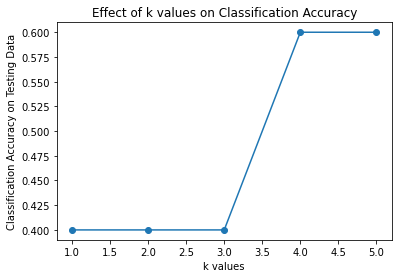

In [4]:
kArr = list(range(1,6))
accuracyArr = []
for k in kArr:
  correctCount = 0
  for i in range(testData.shape[0]):
    if knn(k, testData.iloc[i]):
      correctCount += 1
  accuracy = correctCount/testData.shape[0]
  print(accuracy)
  accuracyArr.append(accuracy)

plt.xlabel("k values")
plt.ylabel('Classification Accuracy on Testing Data')
plt.title("Effect of k values on Classification Accuracy")
plt.scatter(kArr, accuracyArr)
plt.plot(kArr, accuracyArr)